<a href="https://colab.research.google.com/github/fathanick/RNN_LSTM_GRU/blob/master/Sentiment_Analysis_IMDB_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###References

*   https://medium.com/@a.ydobon/tensorflow-2-0-text-classification-with-an-rnn-15220b5201b1
*   https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/6.2-understanding-recurrent-neural-networks.ipynb
*   https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/




In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np

In [0]:
# fix random seed for reproducibility
np.random.seed(7)

###Load IMDB Dataset

In [4]:
# load the dataset but only keep the top n words, zero the rest
from tensorflow.keras.datasets import imdb

top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences


####Pad Sequences

In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. For now, set max_words to 500.

In [5]:
print('Pad sequences (samples x time)')

from tensorflow.keras.preprocessing import sequence

max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

###Simple RNN

In [7]:
model_RNN = Sequential()
model_RNN.add(Embedding(10000, 32))
model_RNN.add(SimpleRNN(32))
model_RNN.add(Dense(1, activation='sigmoid'))
model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_RNN = model_RNN.fit(X_train, y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)       

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 17s 858us/sample - loss: 0.6637 - acc: 0.5989 - val_loss: 0.5985 - val_acc: 0.7252
Epoch 2/5
20000/20000 [==============================] - 14s 719us/sample - loss: 0.5130 - acc: 0.7758 - val_loss: 0.5647 - val_acc: 0.7130
Epoch 3/5
20000/20000 [==============================] - 14s 716us/sample - loss: 0.4828 - acc: 0.7951 - val_loss: 0.4302 - val_acc: 0.8142
Epoch 4/5
20000/20000 [==============================] - 14s 717us/sample - loss: 0.3368 - acc: 0.8679 - val_loss: 0.3894 - val_acc: 0.8374
Epoch 5/5
20000/20000 [==============================] - 14s 718us/sample - loss: 0.2702 - acc: 0.8988 - val_loss: 0.3718 - val_acc: 0.8494


In [8]:
loss_RNN, acc_RNN = model_RNN.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_RNN*100), "%")
print("Loss: %.2f" % (loss_RNN*100), "%")

Accuracy: 84.40 %
Loss: 37.42 %


###LSTM 

In [9]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(10000, 32))
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(1, activation='sigmoid'))
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_LSTM = model_LSTM.fit(X_train, y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)   

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 8s 418us/sample - loss: 0.6591 - acc: 0.6495 - val_loss: 0.5701 - val_acc: 0.7712
Epoch 2/5
20000/20000 [==============================] - 2s 104us/sample - loss: 0.4488 - acc: 0.8137 - val_loss: 0.3819 - val_acc: 0.8476
Epoch 3/5
20000/20000 [==============================] - 2s 102us/sample - loss: 0.3063 - acc: 0.8774 - val_loss: 0.3129 - val_acc: 0.8694
Epoch 4/5
20000/20000 [==============================] - 2s 103us/sample - loss: 0.2419 - acc: 0.9097 - val_loss: 0.2917 - val_acc: 0.8796
Epoch 5/5
20000/20000 [==============================] - 2s 103us/sample - loss: 0.2119 - acc: 0.9231 - val_loss: 0.2956 - val_acc: 0.8796


In [10]:
loss_LSTM, acc_LSTM = model_LSTM.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_LSTM*100), "%")
print("Loss: %.2f" % (loss_LSTM*100), "%")

Accuracy: 87.52 %
Loss: 30.77 %


###GRU

In [11]:
model_GRU = Sequential()
model_GRU.add(Embedding(10000,32))
model_GRU.add(GRU(32))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_GRU = model_GRU.fit(X_train, y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)   

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 4s 189us/sample - loss: 0.6833 - acc: 0.5901 - val_loss: 0.6568 - val_acc: 0.6484
Epoch 2/5
20000/20000 [==============================] - 2s 109us/sample - loss: 0.5363 - acc: 0.7452 - val_loss: 0.5066 - val_acc: 0.7502
Epoch 3/5
20000/20000 [==============================] - 2s 108us/sample - loss: 0.3774 - acc: 0.8353 - val_loss: 0.3795 - val_acc: 0.8310
Epoch 4/5
20000/20000 [==============================] - 2s 107us/sample - loss: 0.2767 - acc: 0.8880 - val_loss: 0.3593 - val_acc: 0.8536
Epoch 5/5
20000/20000 [==============================] - 2s 106us/sample - loss: 0.2392 - acc: 0.9081 - val_loss: 0.3466 - val_acc: 0.8606


In [12]:
loss_GRU, acc_GRU = model_GRU.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f" % (acc_GRU*100), "%")
print("Loss: %.2f" % (loss_GRU*100), "%")

Accuracy: 85.84 %
Loss: 34.42 %


In [0]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(10,8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])

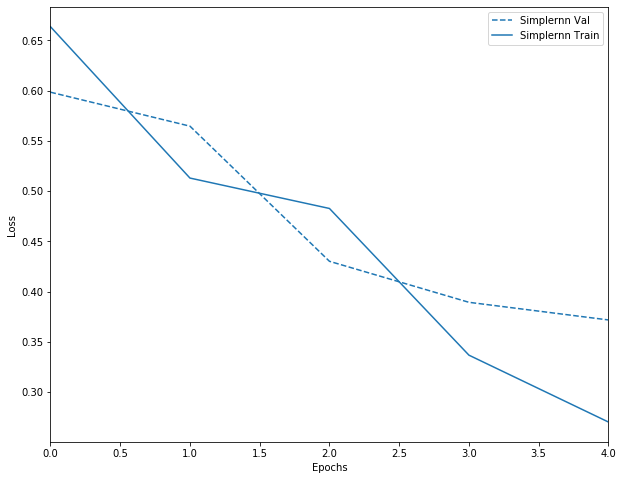

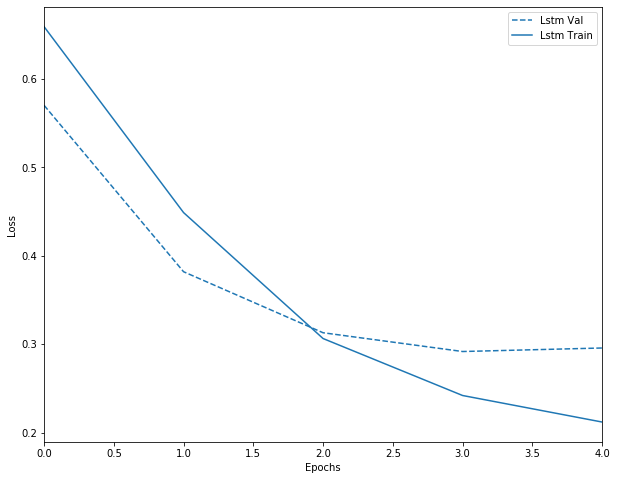

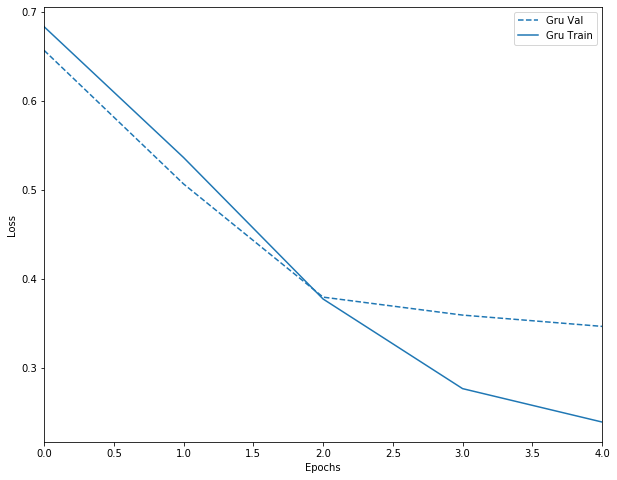

In [15]:
plot_history([('SimpleRNN', history_RNN)])
plot_history([('LSTM', history_LSTM)])
plot_history([('GRU', history_GRU)])